In [1]:
import pandas as pd
import numpy as np

1. Load the dataset and explore the variables.

In [2]:
data = pd.read_csv("customer_churn.csv")

In [3]:
list(data.columns)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


2. We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`,`MonthlyCharges`.

3. Extract the target variable.

In [5]:
data = data[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'Churn']]

In [6]:
data.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes


4. Extract the independent variables and scale them.

In [7]:
import seaborn as sns
import numpy as np
from scipy.stats import norm
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
correlations_matrix = data.corr()

In [9]:
mask = np.zeros_like(correlations_matrix)

In [10]:
mask[np.triu_indices_from(mask)] = True

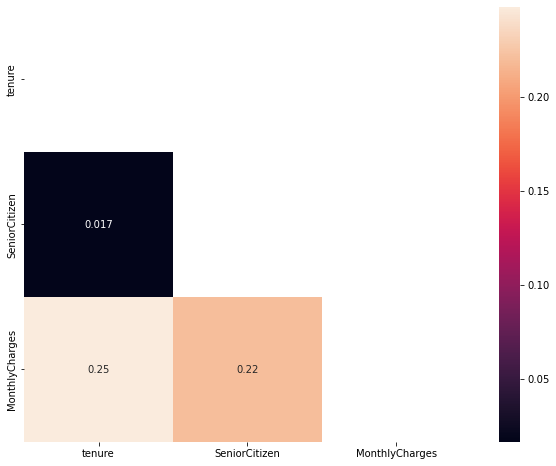

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

5. Build the logistic regression model.

In [12]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [13]:
X = data[['tenure', 'SeniorCitizen','MonthlyCharges']]
y = (data.Churn == 'Yes').astype(int)
transformer = StandardScaler().fit(X)
scaled_x = transformer.transform(X)

6. Evaluate the model.

In [14]:
model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(scaled_x, y)

In [15]:
model.score(scaled_x, y)

0.7911401391452506

7. Even a simple model will give us more than 70% accuracy. Why?

8. **Synthetic Minority Oversampling TEchnique (SMOTE)** is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

9. **Tomek links** are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply `imblearn.under_sampling.TomekLinks` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_sample(scaled_x, y)
y_sm.value_counts()

ModuleNotFoundError: No module named 'imblearn'

In [18]:
## model
model = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_sm, y_sm)

NameError: name 'X_sm' is not defined

In [19]:
model.score(scaled_x, y)

0.7911401391452506

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
y_pred=model.predict(X_sm)
confusion_matrix(y_pred, y_sm)

NameError: name 'X_sm' is not defined

In [22]:
y_pred=model.predict(scaled_x)
confusion_matrix(y_pred, y)

array([[4716, 1013],
       [ 458,  856]], dtype=int64)

In [16]:
from imblearn.under_sampling import TomekLinks

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_sample(scaled_x, y)
y_tl.value_counts()

In [ ]:
model = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_tl, y_tl)

In [ ]:
model.score(X_tl, y_tl)

In [ ]:
y_pred=model.predict(X_tl)
confusion_matrix(y_pred, y_tl)

In [ ]:
model.score(scaled_x, y)

In [ ]:
y_pred=model.predict(scaled_x)
confusion_matrix(y_pred, y)